In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
import torch

In [41]:
import sys
import os
sys.path.append('../')

In [42]:
import json
file = '../data/function_vectors.json'
with open(file, 'r') as f:
    data = json.load(f)

In [43]:
data.keys()

dict_keys(['income_antonym', 'age_antonym', 'gender_antonym', 'urban_rural_antonym', 'antonym'])

In [44]:
new_data = {}

for key, value in data.items():
    new_data[key] = value['FV']

In [45]:
labels = list(new_data.keys())

In [46]:
labels

['income_antonym',
 'age_antonym',
 'gender_antonym',
 'urban_rural_antonym',
 'antonym']

In [47]:
X = []
for key, value in new_data.items():
    X.append(np.array(value[0]))

In [48]:
X = np.vstack(X)

In [49]:
X.shape

(5, 4096)

In [50]:
X

array([[ 0.56384575, -0.9583208 , -0.84401524, ..., -1.23778343,
         0.43571338, -0.84203041],
       [ 0.42465016, -0.95260692, -0.5529927 , ..., -0.54993856,
        -0.06636799, -0.40544367],
       [ 0.52886778, -1.21029067, -0.38493475, ..., -0.85749906,
        -0.03908417, -0.86325687],
       [-0.84117651, -0.58707649,  0.20477453, ..., -1.93679965,
         0.25055599,  0.3714135 ],
       [ 0.96854305, -1.09067798, -0.74976504, ..., -0.97297704,
         0.47772184, -0.16993241]])

In [34]:
# Apply t-SNE to reduce the dimensionality to 2 or 3 dimensions
tsne = TSNE(n_components=2, perplexity=4)  # You can also use n_components=3 for 3D visualization
X_embedded = tsne.fit_transform(X)

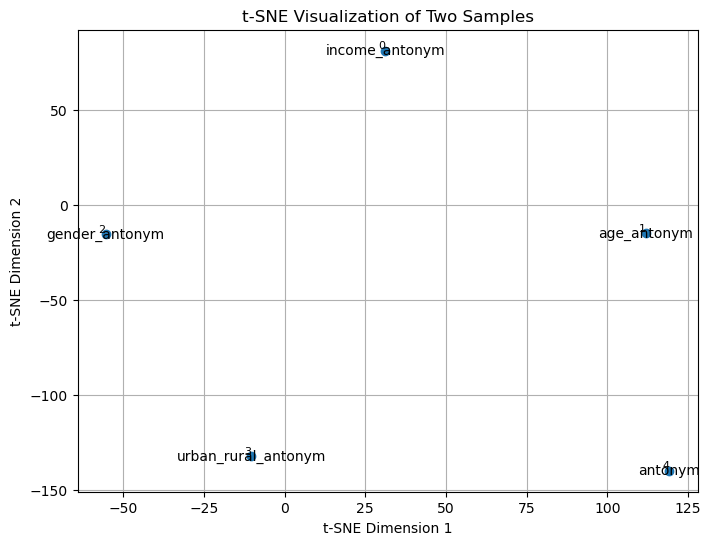

In [35]:

# Plot the transformed data with labels and numbering
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

# Add labels and numbering
for i, label in enumerate(labels):
    plt.text(X_embedded[i, 0], X_embedded[i, 1], label, fontsize=10, ha='center', va='center')
    plt.text(X_embedded[i, 0], X_embedded[i, 1], str(i), fontsize=8, ha='right', va='bottom')

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Two Samples')
plt.grid(True)
plt.show()

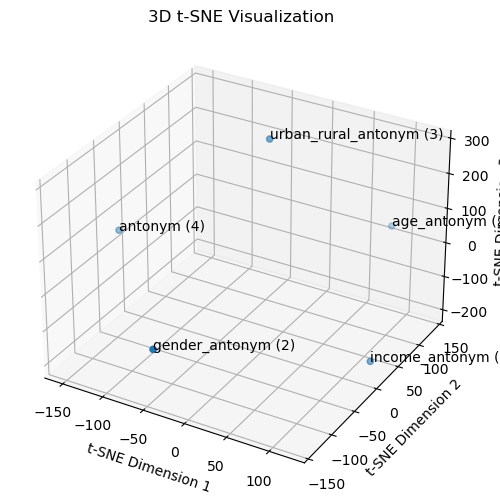

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming 'X' is your dataset and 'labels' are the labels for each data point

# Perform t-SNE dimensionality reduction to 3 dimensions
tsne = TSNE(n_components=3, perplexity=3)
X_embedded = tsne.fit_transform(X)

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot for the transformed data
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], X_embedded[:, 2])

# Add labels and numbering
for i, label in enumerate(labels):
    ax.text(X_embedded[i, 0], X_embedded[i, 1], X_embedded[i, 2], '%s (%d)' % (label, i), fontsize=10)

ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.title('3D t-SNE Visualization')
plt.show()

In [36]:
import faiss

# Calculate nearest neighbors using the L2 distance
index = faiss.IndexFlatL2(2)
index.add(X_embedded)
D, I = index.search(X_embedded, 5)

In [37]:
# Print the nearest neighbors
for i in range(len(I)):
    print(f"Nearest neighbors of {labels[i]}:")
    for j in range(1, len(I[i])):
        print(f"{j}: {labels[I[i][j]]} (distance: {D[i][j]})")
    print()

Nearest neighbors of income_antonym:
1: age_antonym (distance: 15707.439453125)
2: gender_antonym (distance: 16839.9921875)
3: urban_rural_antonym (distance: 47199.22265625)
4: antonym (distance: 56604.6484375)

Nearest neighbors of age_antonym:
1: antonym (distance: 15703.5703125)
2: income_antonym (distance: 15707.439453125)
3: gender_antonym (distance: 28014.12109375)
4: urban_rural_antonym (distance: 28694.83203125)

Nearest neighbors of gender_antonym:
1: urban_rural_antonym (distance: 15661.3408203125)
2: income_antonym (distance: 16839.9921875)
3: age_antonym (distance: 28014.12109375)
4: antonym (distance: 46040.93359375)

Nearest neighbors of urban_rural_antonym:
1: gender_antonym (distance: 15661.3408203125)
2: antonym (distance: 16854.537109375)
3: age_antonym (distance: 28694.83203125)
4: income_antonym (distance: 47199.22265625)

Nearest neighbors of antonym:
1: age_antonym (distance: 15703.5703125)
2: urban_rural_antonym (distance: 16854.537109375)
3: gender_antonym (dist

In [38]:
# Average distance to nearest neighbors for each sample
avg_dist = np.mean(D, axis=1)
for i in range(len(avg_dist)):
    print(f"Average distance to nearest neighbors of {labels[i]}: {avg_dist[i]}")

Average distance to nearest neighbors of income_antonym: 27270.26171875
Average distance to nearest neighbors of age_antonym: 17623.994140625
Average distance to nearest neighbors of gender_antonym: 21311.27734375
Average distance to nearest neighbors of urban_rural_antonym: 21681.98828125
Average distance to nearest neighbors of antonym: 27040.73828125


----